# CTann Assessment
## Author: Rishikesh Kakde (rkakde@iu.edu)

## Dataset Information

- **Description:** 10X snRNA-seq data of human kidney  
- **Group:** University of California San Diego TMC  
- **Consortium:** HuBMAP  
- **Citation:** [doi:10.35079/HBM572.JLDL.664](https://doi.org/10.35079/HBM572.JLDL.664)  
- **Publication Date:** 2023-04-09  
- **Link:** [View Dataset](https://doi.org/10.35079/HBM572.JLDL.664)

Note that I have used the expr.h5ad file for this analysis

## Setting up the environment

In [1]:
# Installing Dependencies
!pip install anndata requests
!pip install matplotlib
!pip install seaborn
!pip install pandas

## Importing Annotation file to check contents

In [2]:
import anndata as ad

annotated_adata = ad.read_h5ad("expr.h5ad")

This code calculates the number of cells for each cell type using the annotated data [1]. It counts the occurrences of each cell type annotation in the annotated_adata.obs['cell_type_annotation'] Series.

In [3]:
annotated_adata.obs.head()  # View the first few rows of observation (cell) metadata

""
AAACCCAAGACTAAGT
AAACCCAAGACTCTAC
AAACCCAAGGAATGTT
AAACCCAAGGATATGT
AAACCCAAGGGCCCTT


In [4]:
annotated_adata.var.head()  # View the first few rows of gene metadata

,hugo_symbol
ENSG00000000003.15,TSPAN6
ENSG00000000005.6,TNMD
ENSG00000000419.13,NaN
ENSG00000000457.14,SCYL3
ENSG00000000460.17,C1orf112


In [5]:
annotated_adata.X.shape  # Check the dimensions (cells x genes)

(10999, 60286)

The dataset has 10,999 cells and 60,286 genes

## Running the Azimuth Annotations using R Script

In [6]:
import subprocess
# Ucomment and Run this cell to setup R enviroment for the analysis
#result1 = subprocess.run(["Rscript", "LibraryInstallations.R"], capture_output=True, text=True)

In [7]:
import subprocess

result = subprocess.run(["Rscript", "azimuth_script.R"], capture_output=True, text=True)

I used 'kidneyref' in the SeuratData Package as reference for Azimuth annotation.

## Viewing Annotation Results & Analysis on the Distribution of Cell Type


In [8]:
import pandas as pd

df = pd.read_csv("annotated_expr.csv")

In [9]:
df.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,predicted.annotation.l1.score,predicted.annotation.l1,predicted.annotation.l2.score,predicted.annotation.l2,predicted.annotation.l3.score,predicted.annotation.l3,mapping.score
0,SeuratProject,682.218241,532,6.568791,0.739455,Fibroblast,0.739455,Medullary Fibroblast,0.739455,Medullary Fibroblast,0.635889
1,SeuratProject,6030.285888,2582,6.800384,1.000000,Principal,1.000000,Inner Medullary Collecting Duct,1.000000,Inner Medullary Collecting Duct,0.625590
2,SeuratProject,2124.557328,1141,2.706446,0.967757,Principal,0.868415,Inner Medullary Collecting Duct,0.868415,Inner Medullary Collecting Duct,0.805629
3,SeuratProject,1399.949074,908,2.119125,0.730658,Descending Thin Limb,0.574441,Descending Thin Limb Type 3,0.574441,Descending Thin Limb Type 3,0.728727
4,SeuratProject,780.649993,631,4.483443,0.493369,Connecting Tubule,0.493369,Connecting Tubule,0.477432,Connecting Tubule,0.569920


## Tabular View of Cell Type Count

In [10]:
cell_type_counts = df['predicted.annotation.l1'].value_counts()

# Convert to DataFrame for better tabular display
cell_type_counts_df = cell_type_counts.reset_index()
cell_type_counts_df.columns = ['Cell Type', 'Count']

# Print in tabular format
cell_type_counts_df

,Cell Type,Count
0,Principal,5199
1,Descending Thin Limb,1527
2,Fibroblast,1162
3,Connecting Tubule,1113
4,Endothelial,1047
5,Papillary Tip Epithelial,586
6,Ascending Thin Limb,271
7,Immune,46
8,Vascular Smooth Muscle / Pericyte,42
9,Thick Ascending Limb,3


This code visualizes the distribution of cells per cell type using matplotlib and seaborn. It creates a bar plot showing the count of each cell type.

## Visualization of the Cell Type Distribution

/var/folders/39/6h89h6d53p70wqskpvl76y9c0000gn/T/ipykernel_51792/2937214263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cell_type_counts.index, y=cell_type_counts.values, palette="viridis")


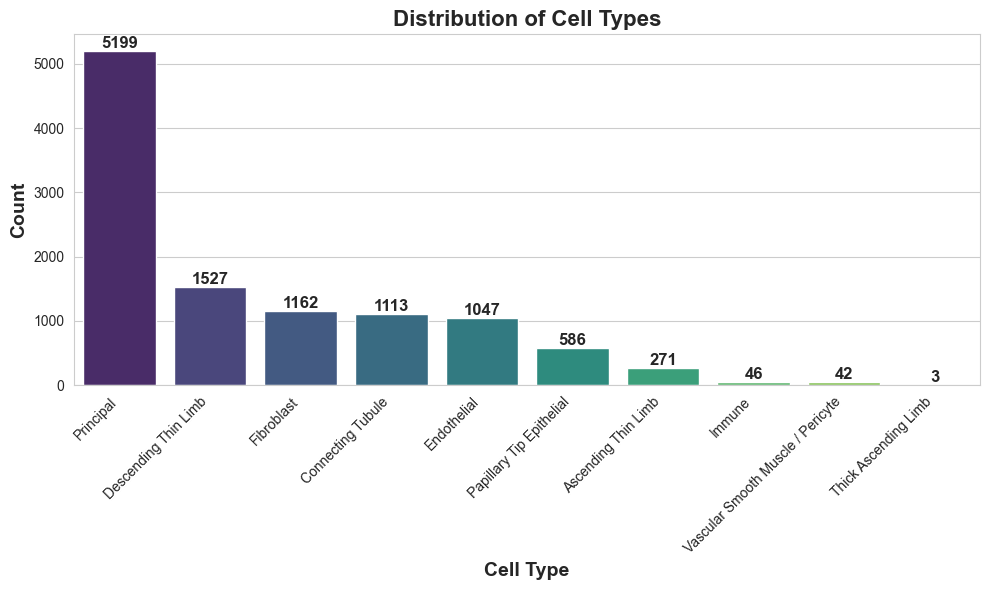

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the bar plot
ax = sns.barplot(x=cell_type_counts.index, y=cell_type_counts.values, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add axis labels
plt.xlabel("Cell Type", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')

# Add title
plt.title("Distribution of Cell Types", fontsize=16, fontweight='bold')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## **Inference on Cell Type Distribution**
The distribution of cell types reveals a highly imbalanced composition, with **Principal cells** being the most abundant, comprising **5199 occurrences**. This dominance significantly outweighs all other cell types, suggesting that Principal cells play a crucial role in the observed biological system.

The **Descending Thin Limb (1527), Fibroblast (1162), Connecting Tubule (1113), and Endothelial (1047)** cells form a secondary group with moderate counts, ranging between 1000 and 1600. These cell types likely contribute substantially to system functions but are present in far fewer numbers than Principal cells.

A further drop in count is observed for **Papillary Tip Epithelial (586)** and **Ascending Thin Limb (271)** cells, indicating that these are less frequent but still relevant.

The **Immune (46), Vascular Smooth Muscle / Pericyte (42), and Thick Ascending Limb (3)** cells appear to be extremely rare, suggesting either a highly specialized function or minimal presence in the analyzed dataset.

### **Key Insights:**
1. **Principal cells are the predominant type**, accounting for more than half of the total observations.
2. **A steep decline in frequency** is evident from Principal cells to other types, emphasizing a hierarchical abundance.
3. **Scarce cell types** such as Immune, Vascular Smooth Muscle/Pericyte, and Thick Ascending Limb may indicate specialized or limited roles in the studied context.
